In [19]:
# -*- coding: utf-8 -*-

"""
@Time        : 7/1/2023
@Author      : purmortal
@File        : plot_gist_aggregation
@Description : 
"""
import sys

from utils import  *
import gist_plot as gist_plot
import gist_mass_fraction_plot as gist_mass_fraction_plot
from weights_loader import weights

import matplotlib

from multiprocessing import Pool
from astropy.io import fits
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.stats import pearsonr
from spectres import spectres
import numpy as np

import os


# Define your own paths
fig_path = './figs/L0x2' # path to save figs
cube_gist_path = '/Users/selilium/galcraft_test/L0x2/gist/' # path of gist products
cube_gist_run = 'resultsRevisedME' # folder name of GIST products
fraction_type = 'mass fraction' # Depending on whether the SSP spectra is normalized to one solar mass or one solar luminosity


# To Michael:
# For your case, the below path should work
#fig_path = './fig/' # path to save figs
#cube_gist_path = '/ourdisk/hpc/galacticos/data/dont_archive/datacubes/galcraft_test/' # path of gist products
#cube_gist_run = 'resultsRevisedREmdeg4' # folder name of GIST products
#fraction_type = 'mass fraction' # Depending on whether the SSP spectra is normalized to one solar mass or one solar luminosity



In [20]:
fig_path_run = fig_path  + cube_gist_run
print (fig_path, cube_gist_run, fig_path_run)
if os.path.exists(fig_path_run) == False:
    os.mkdir(fig_path_run)

cube_gist_run_path = cube_gist_path + cube_gist_run + '/'
filename = cube_gist_run_path + cube_gist_run

cmap_color = 'sauron'

./figs/L0x2 resultsRevisedME ./figs/L0x2resultsRevisedME


# Weighted average

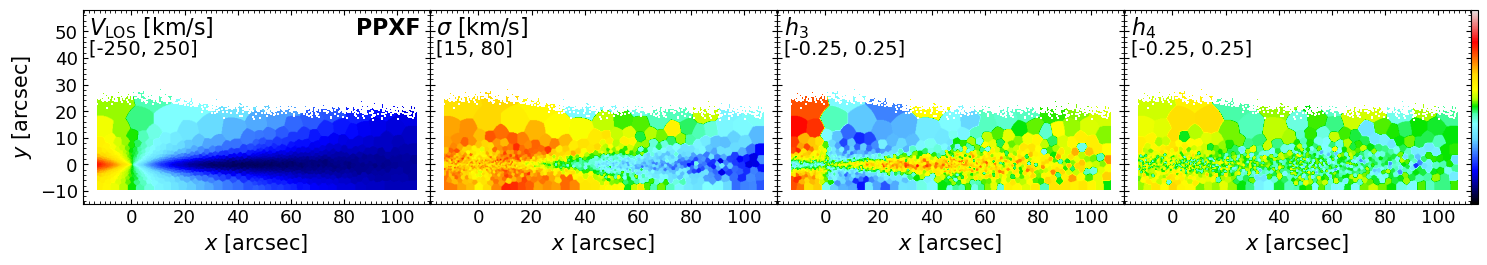

In [21]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# KIN
vminmax = np.array([[[-250, 250], [15, 80], [-0.25, 0.25], [-0.25, 0.25]]])
result_l = gist_plot.read_results_kin(filename, [''])
fig_kin = gist_plot.plot_kin(filename, ['PPXF'], result_l=result_l, vminmax=vminmax,
                use_vminmax=[True], residual=[False], cmap_l=[cmap_color] * len(result_l))
fig_kin.savefig(fig_path_run + '/test_kin_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

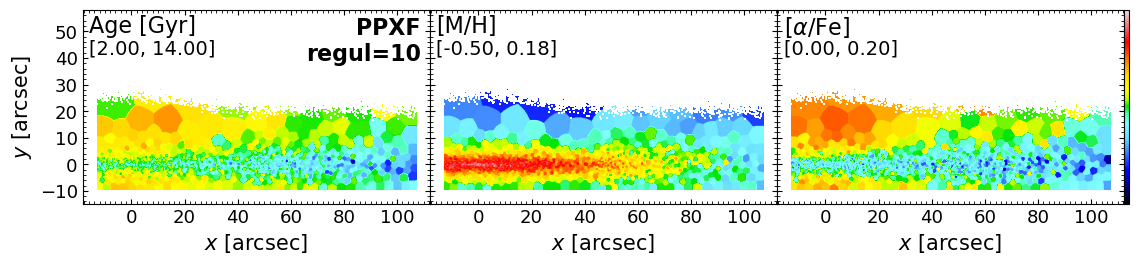

In [22]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# SFH
sfh_header = fits.open(filename + '_sfh.fits')[1].header
if sfh_header['HIERARCH REGUL_ERR'] == None:
    regul = 0
else:
    regul = 1 / sfh_header['HIERARCH REGUL_ERR']


vminmax = np.array([[[2, 14], [-0.5, 0.18], [0, 0.2]]])
result_l = gist_plot.read_results_sfh(filename, flag=['SFH'], suffix=[''])
fig_sfh = gist_plot.plot_sfh(filename, ['PPXF\nregul=' + str(int(regul))],
                             result_l=result_l, vminmax=vminmax, use_vminmax=[True],
                             residual=[False], cmap_l=[cmap_color] * len(result_l))
res_age_array = np.unique(result_l[-1][:, 0])
res_metal_array = np.unique(result_l[-1][:, 1])
res_alpha_array = np.unique(result_l[-1][:, 2])
fig_sfh.savefig(fig_path_run + '/test_sfh_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

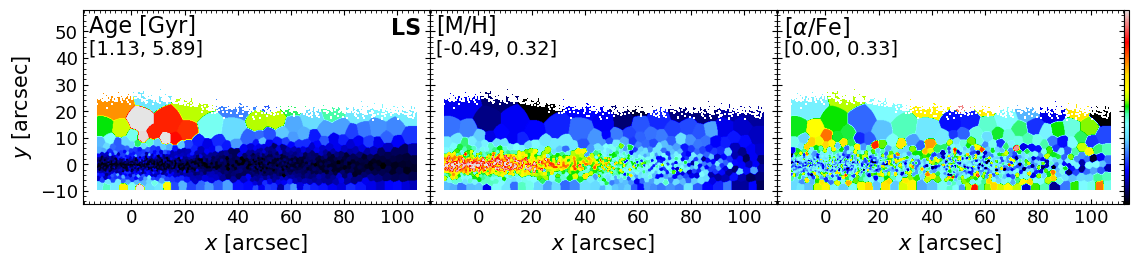

In [23]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# LS
if os.path.exists(filename + '_ls_AdapRes.fits'):
    result_l = gist_plot.read_results_sfh(filename, flag=['LS'], suffix=[''])
    fig_ls = gist_plot.plot_sfh(filename, ['LS'], result_l=result_l, use_vminmax=[False], cmap_l=[cmap_color] * len(result_l))
    fig_ls.savefig(fig_path_run + '/test_sfh_ls_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

# Global Mass distribution

In [24]:
ppxf_weights = weights(cube_gist_path, cube_gist_run, mode='ppxf', fraction_type=fraction_type)
true_weights = weights(cube_gist_path, cube_gist_run, mode='true', fraction_type=fraction_type)

# To Michael:
# ppxf_weights are the weights that obtained from PPXF spectral fitting
# true_weights here are the weights that I calculated by myself as the "true" value 
# in the GalCraft paper to compare with PPXF weights, you can change it to your nGIST
# results by changing the 'cube_gist_path' and 'cube_gist_run', mode='ppxf' keywords 

/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:237: RuntimeWarning: divide by zero encountered in log10
  log_wdf_nuclear = np.log10(np.nansum(weights_nuclear, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:238: RuntimeWarning: divide by zero encountered in log10
  log_wdf_bulge = np.log10(np.nansum(weights_bulge, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:240: RuntimeWarning: divide by zero encountered in log10
  log_wdf_thick = np.log10(np.nansum(weights_thick, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:241: RuntimeWarning: divide by zero encountered in log10
  log_wdf_innerthin = np.log10(np.nansum(weights_innerthin, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:243: RuntimeWarning: divide by zero encountered in log10
  log_wdf_innerthick = np.log10(np.nansum(weights

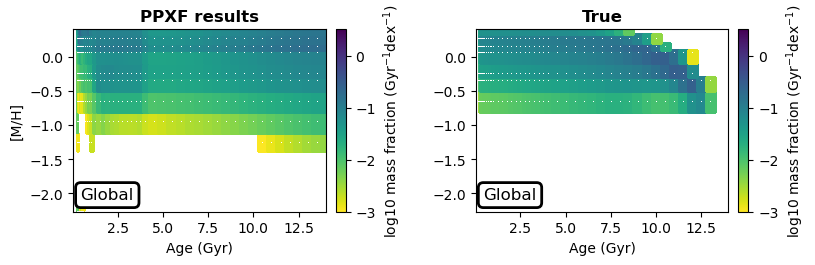

In [25]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# mass/light-fraction distribution



fig_mft = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.log_wdf], [true_weights.log_wdf]],
                                [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                                [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                                ['Global'], ['PPXF results', 'True'], vmin=-3, vmax=0.5,
                                axes_pad=[1.3, 0.3], cbar_mode='each', cbar_location='right', cbar_pad=0.1,
                                cb_label=r'log10 %s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis_r', nodots=False)
fig_mft.tight_layout(pad=0.15)
fig_mft.savefig(fig_path_run + '/2dmfd_global_massperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

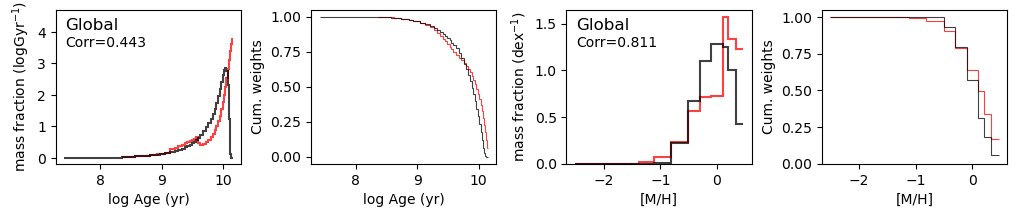

In [26]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution perlogage, logage
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb_log[:, 0, 0], true_weights.yyb_log[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=['log', None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperlogGyr_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

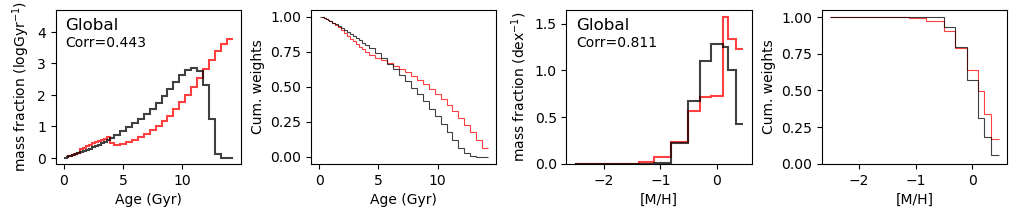

In [27]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution perlogage
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb_log[:, 0, 0], true_weights.yyb_log[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=['log', None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperlogGyr_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

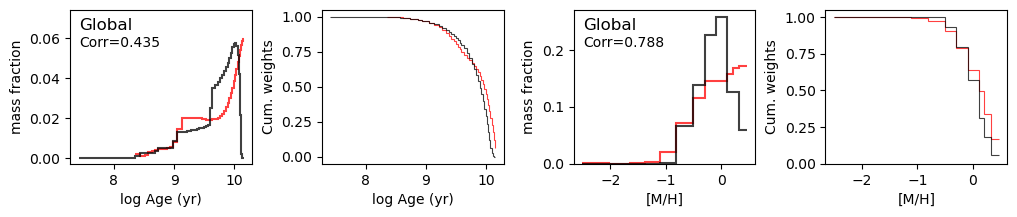

In [28]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution in log age space
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[False, None, False, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weights_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

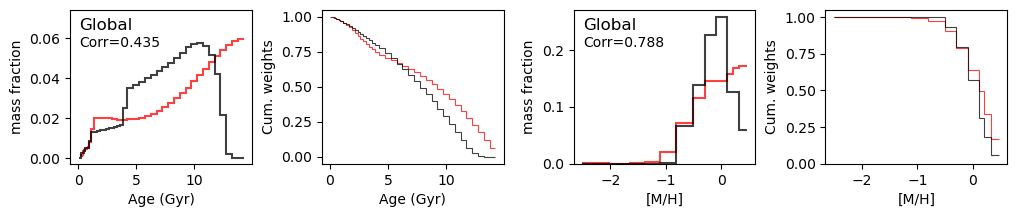

In [29]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[False, None, False, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weights_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

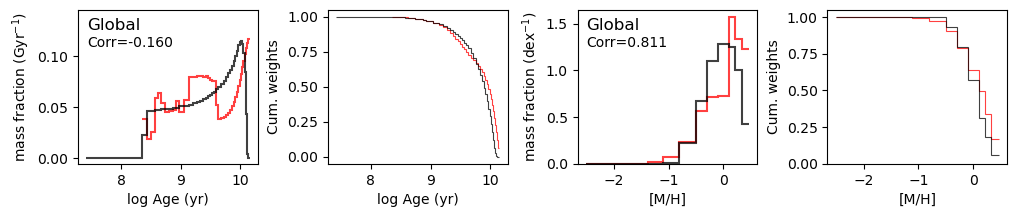

In [30]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot same figure without dividing binsize
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperGyr_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

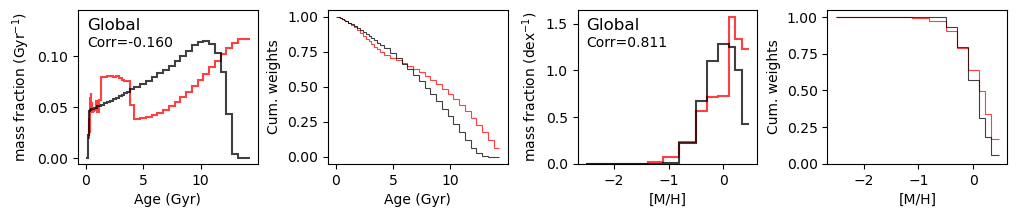

In [31]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot same figure without dividing binsize
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperGyr_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

# Mass distribution of different components

/var/folders/2_/44rr6rk915g7v4b1dstqddh40000gn/T/ipykernel_3022/3790648592.py:11: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.flip(np.log(ppxf_weights.flux_reshape), axis=0), cmap='gist_yarg', vmax=np.nanpercentile(np.log(ppxf_weights.flux_reshape), 99),


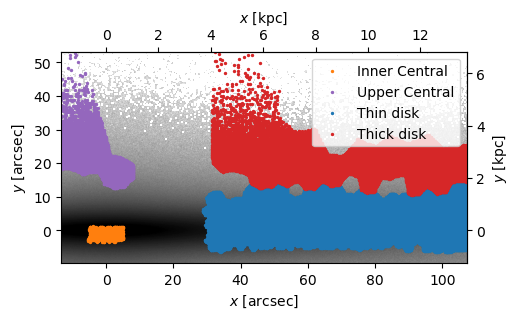

In [32]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot components distribution

def arcsec2dist(arc):
    return 26500 * arc / 3600 * np.pi / 180

def dist2arcsec(dist):
    return dist * 180 / np.pi * 3600 / 26500

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
ax.imshow(np.flip(np.log(ppxf_weights.flux_reshape), axis=0), cmap='gist_yarg', vmax=np.nanpercentile(np.log(ppxf_weights.flux_reshape), 99),
          extent=[np.min(ppxf_weights.results_table['X']) - ppxf_weights.pixelsize / 2, np.max(ppxf_weights.results_table['X']) + ppxf_weights.pixelsize / 2,
                  np.min(ppxf_weights.results_table['Y']) - ppxf_weights.pixelsize / 2, np.max(ppxf_weights.results_table['Y']) + ppxf_weights.pixelsize / 2])
ax.scatter(ppxf_weights.results_nuclear['X'], ppxf_weights.results_nuclear['Y'], s=2, c='tab:orange', label='Inner Central')
ax.scatter(ppxf_weights.results_bulge['X'], ppxf_weights.results_bulge['Y'], s=2, c='tab:purple', label='Upper Central')
ax.scatter(ppxf_weights.results_thin['X'], ppxf_weights.results_thin['Y'], s=2, c='tab:blue', label='Thin disk')
ax.scatter(ppxf_weights.results_thick['X'], ppxf_weights.results_thick['Y'], s=2, c='tab:red', label='Thick disk')
ax.set_xlabel(r'$x$ [arcsec]')
ax.set_ylabel(r'$y$ [arcsec]')
secaxx = ax.secondary_xaxis('top', functions=(arcsec2dist, dist2arcsec))
secaxx.set_xlabel(r'$x$ [kpc]')
secaxy = ax.secondary_yaxis('right', functions=(arcsec2dist, dist2arcsec))
secaxy.set_ylabel(r'$y$ [kpc]')
plt.legend()
plt.tight_layout(pad=0.01)
plt.savefig(fig_path_run + '/galaxy_components_' + cube_gist_run + '.png', dpi=500)

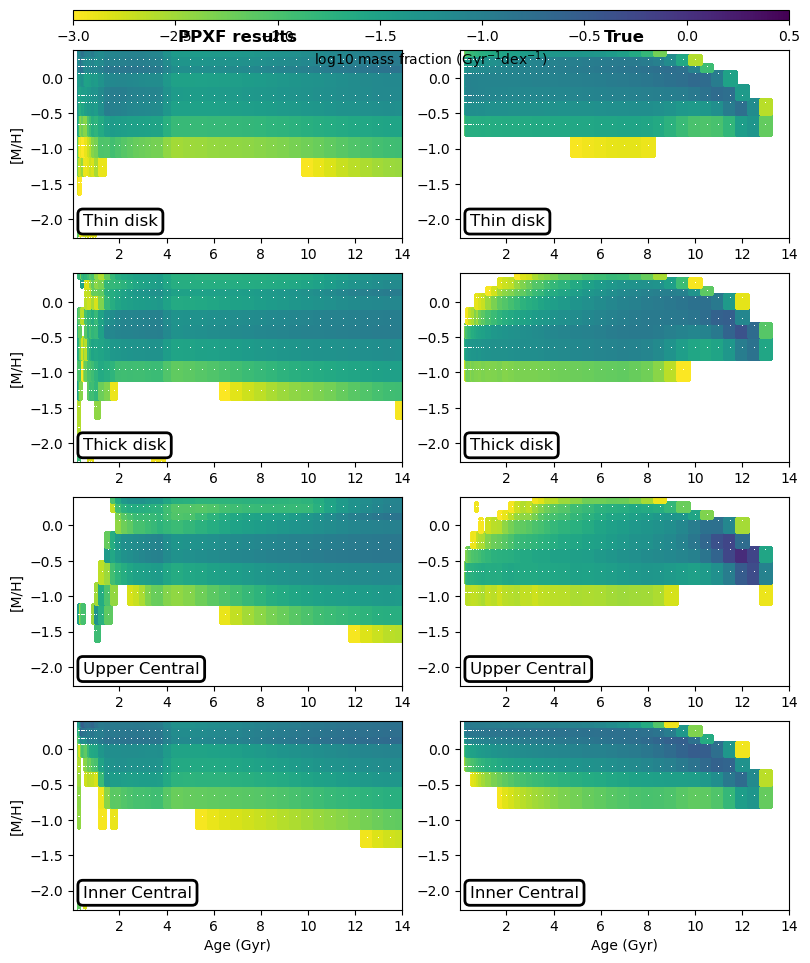

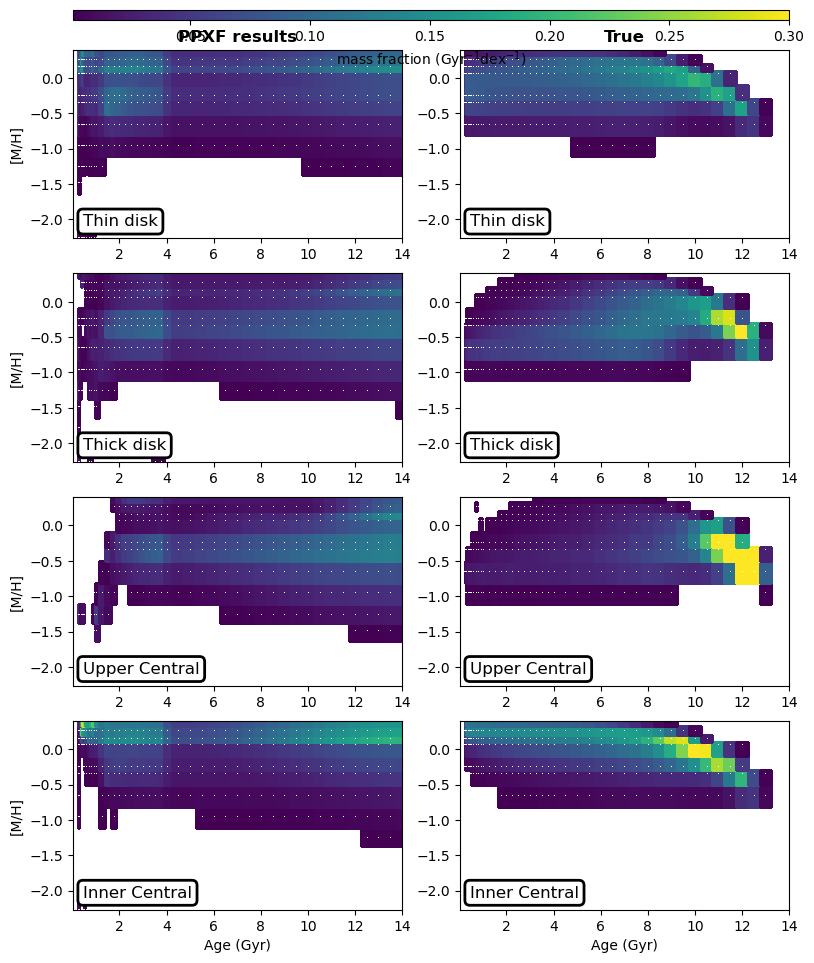

In [33]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
fig = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.log_wdf_thin, ppxf_weights.log_wdf_thick, ppxf_weights.log_wdf_bulge, ppxf_weights.log_wdf_nuclear],
                             [true_weights.log_wdf_thin, true_weights.log_wdf_thick, true_weights.log_wdf_bulge, true_weights.log_wdf_nuclear]],
                            [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                            [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                            ['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central'], ['PPXF results', 'True'], vmin=-3, vmax=0.5,
                            axes_pad=(0.58, 0.35), cbar_mode='single', cbar_location='top', cbar_pad=0.3,
                            cb_label=r'log10 %s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis_r', nodots=False)
fig.subplots_adjust(left=0.085, bottom=0.05, right=0.980, top=0.95)
fig.savefig(fig_path_run + '/2dmfd_components_logweightsperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

fig = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.wdf_thin, ppxf_weights.wdf_thick, ppxf_weights.wdf_bulge, ppxf_weights.wdf_nuclear],
                             [true_weights.wdf_thin, true_weights.wdf_thick, true_weights.wdf_bulge, true_weights.wdf_nuclear]],
                            [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                            [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                            ['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central'], ['PPXF results', 'True'], vmin=0.001, vmax=0.3,
                            axes_pad=(0.58, 0.35), cbar_mode='single', cbar_location='top', cbar_pad=0.3,
                            cb_label=r'%s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis', nodots=False)
fig.subplots_adjust(left=0.085, bottom=0.05, right=0.980, top=0.95)
fig.savefig(fig_path_run + '/2dmfd_components_weightsperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

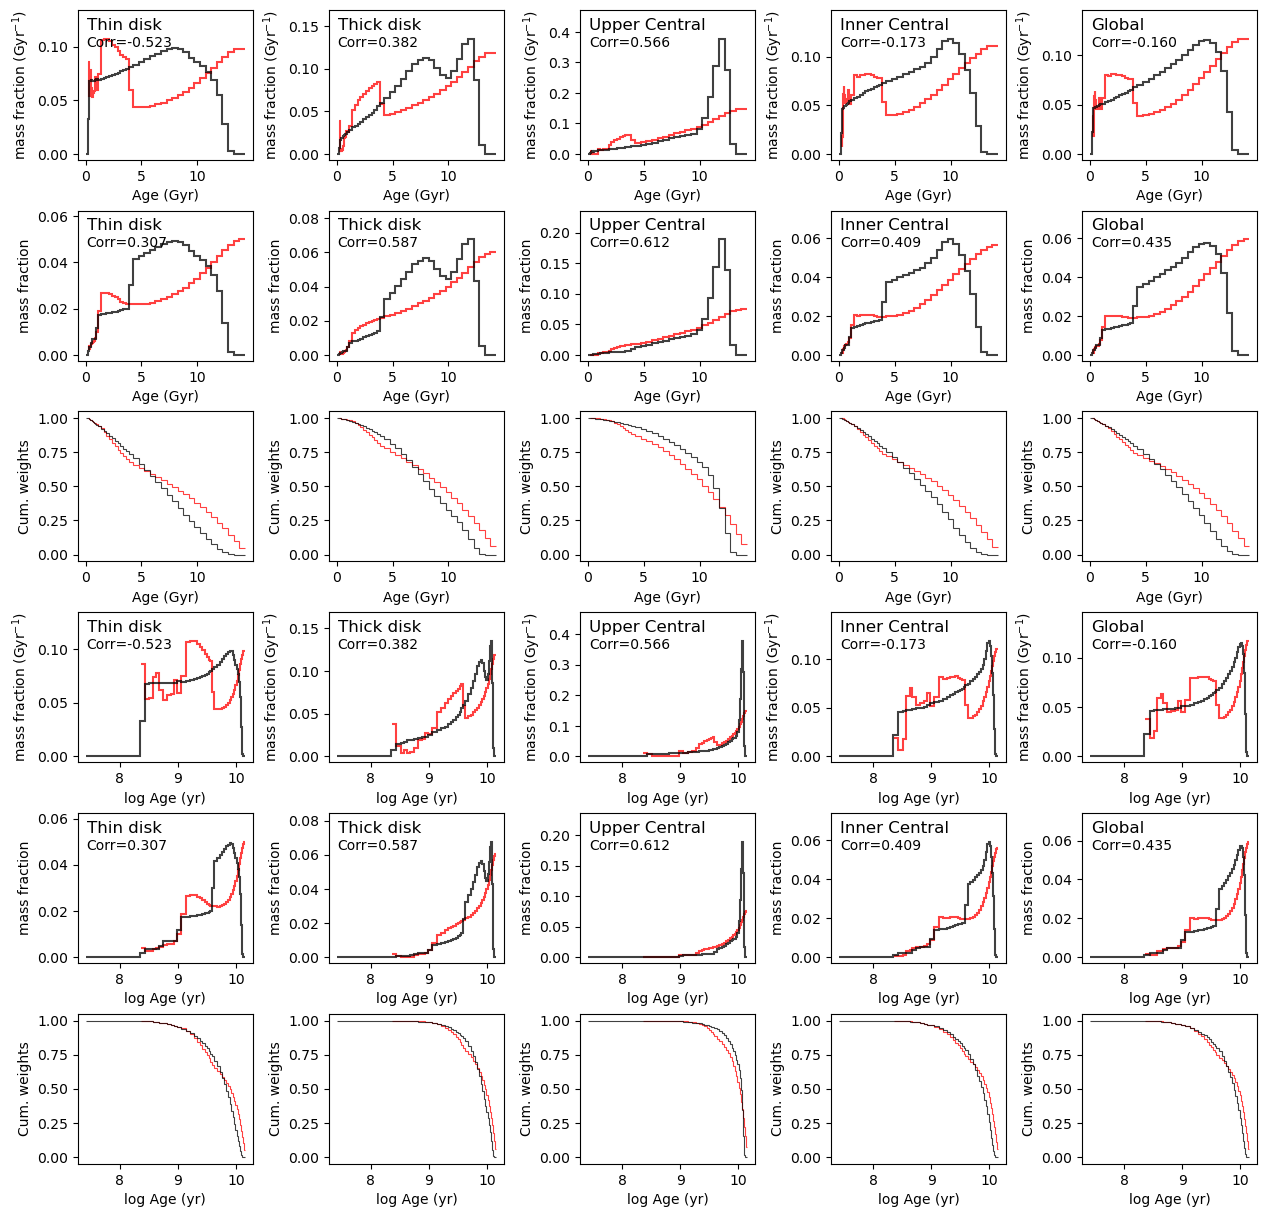

In [34]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# star formation history in log ang linear age space with cumulative figures
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.weights_thin, ppxf_weights.weights_thick, ppxf_weights.weights_bulge, ppxf_weights.weights_nuclear, ppxf_weights.cumulative_weights_2d],
                                          [true_weights.weights_thin, true_weights.weights_thick, true_weights.weights_bulge, true_weights.weights_nuclear, true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_stairs', 'age_cum', 'logage_stairs', 'logage_stairs', 'logage_cum'],
                            perbinsize_list=[True, False, None, True, False, None],
                            logmass_list=[False, False, False, False, False, False],
                            show_corr_list=[True, True, False, True, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central', 'Global'],
                            direction='row', fraction_type=fraction_type
                           )
plt.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5)
plt.savefig(fig_path_run + '/1dmfd_components_weightsmassperGyr_linlogage_' + cube_gist_run + '.pdf', dpi=500)

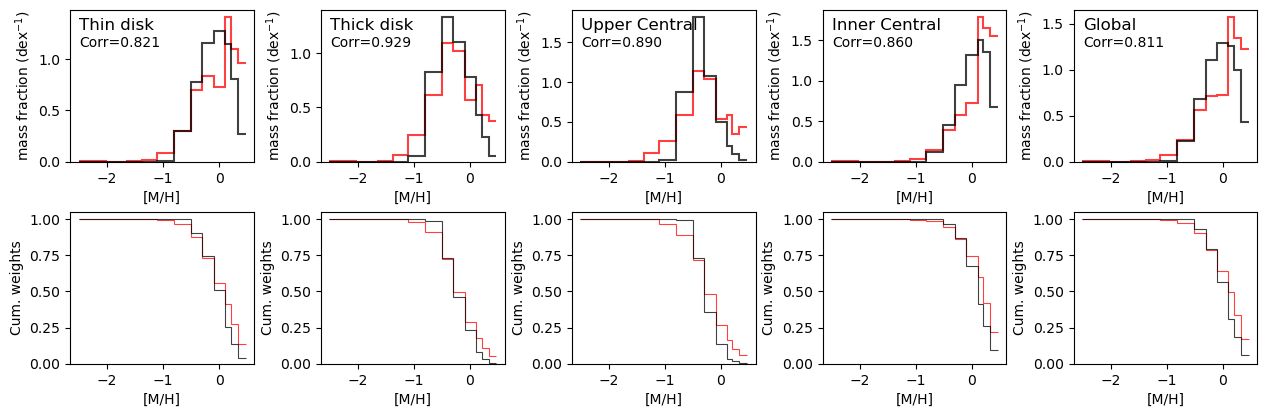

In [35]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 1d metallicity distribution and cumulative distribution
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.weights_thin, ppxf_weights.weights_thick, ppxf_weights.weights_bulge, ppxf_weights.weights_nuclear, ppxf_weights.cumulative_weights_2d],
                                          [true_weights.weights_thin, true_weights.weights_thick, true_weights.weights_bulge, true_weights.weights_nuclear, true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, False],
                            logmass_list=[False, False],
                            show_corr_list=[True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central', 'Global'],
                            direction='row', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5)
fig.savefig(fig_path_run + '/1dmfd_components_weightsperdex_metal_' + cube_gist_run + '.pdf', dpi=500)

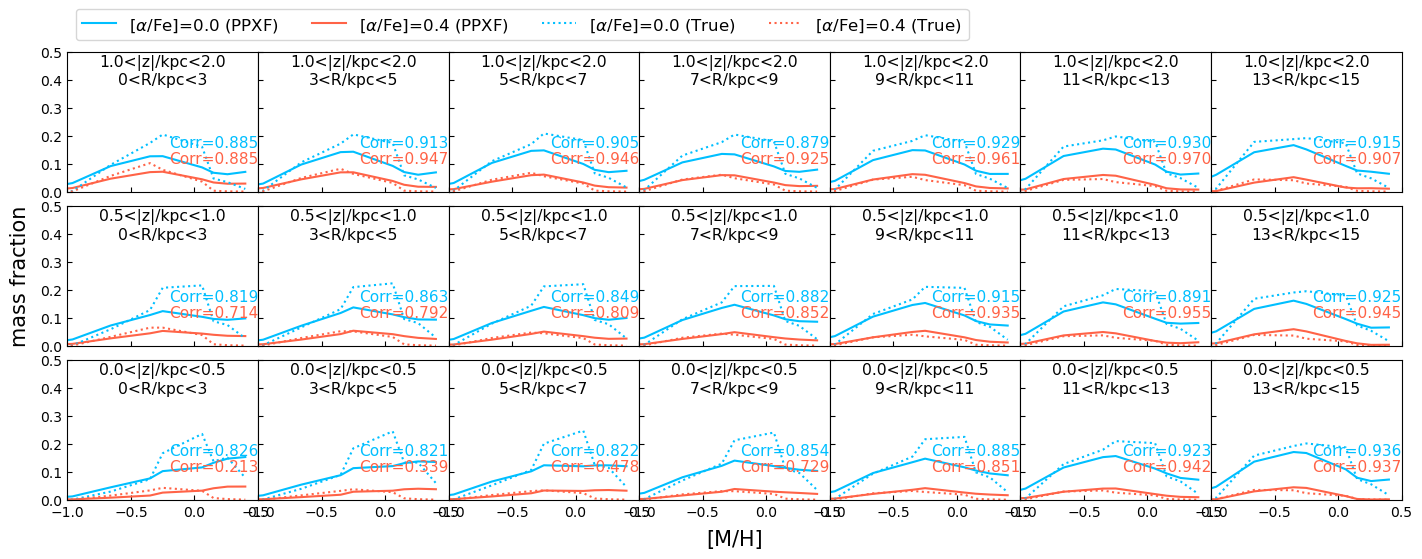

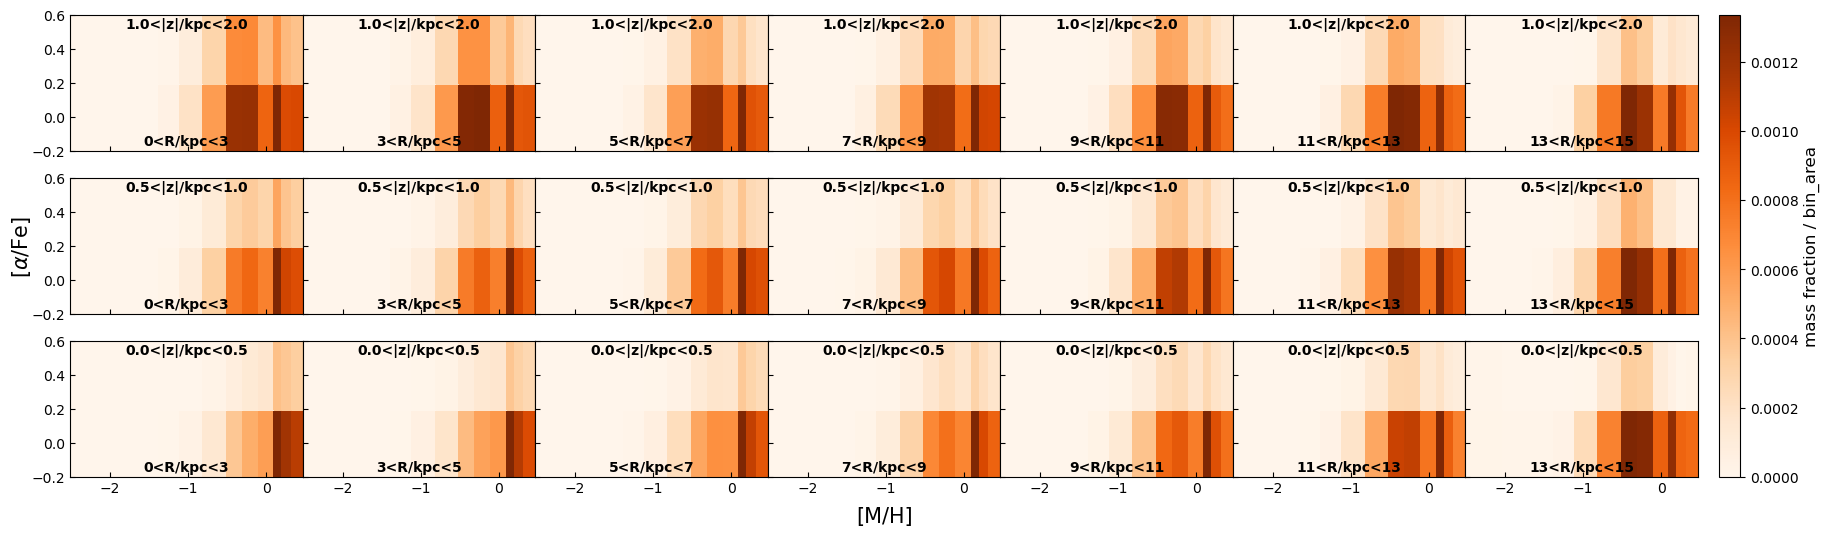

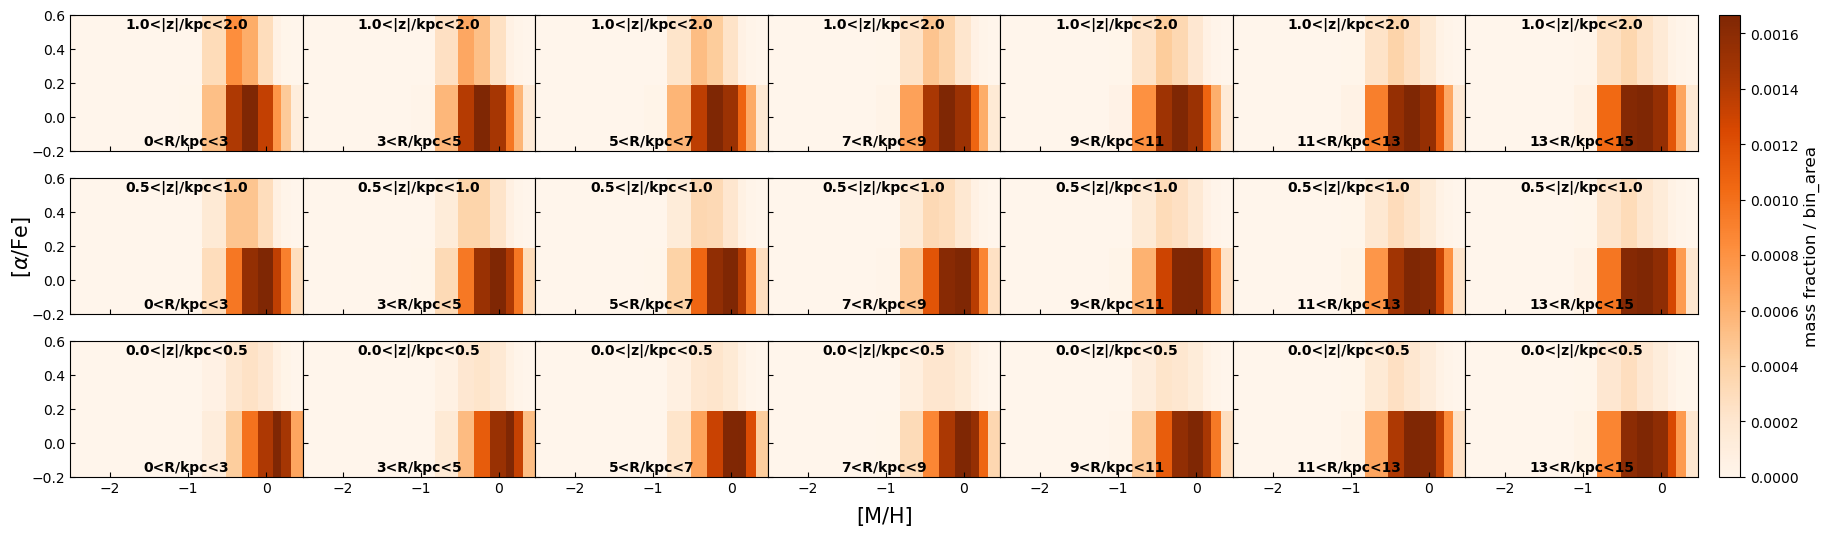

In [36]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# [M/H] - [alpha/Fe] distributions
if ppxf_weights.reg_dim[2] > 1 and true_weights.reg_dim[2] > 1:
    d = 26500 # kpc
    rbin = np.array([0, 3, 5, 7, 9, 11, 13, 15])
    zbin = np.array([0, 0.5, 1, 2])

    fig_maprzhist = gist_mass_fraction_plot.plot_mh_alpha_rz_hist(ppxf_weights.weights_values, true_weights.weights_values, rbin, zbin, d,
                                                                  ppxf_weights.reg_dim, true_weights.reg_dim, ppxf_weights.results_table,
                                                                  metal_grid=ppxf_weights.metal_grid_2d[0, :, 0], metal_grid_true=true_weights.metal_grid_2d[0, :, 0],
                                                                  fraction_type=fraction_type)
    fig_maprzhist.savefig(fig_path_run + '/alphafe_mh_rz_hist_' + cube_gist_run + '.pdf', dpi=500)

    fig_maprz = gist_mass_fraction_plot.plot_mh_alpha_rz(ppxf_weights.weights_values, rbin, zbin, d, ppxf_weights.results_table, reg_dim=ppxf_weights.reg_dim, \
                                                         metal_grid=ppxf_weights.metal_grid_2d[0, :, 0], alpha_grid=ppxf_weights.alpha_grid_2d[0, 0, :])
    fig_maprz.savefig(fig_path_run + '/alphafe_mh_rz_' + cube_gist_run + '.pdf', dpi=500)

    fig_maprz_true = gist_mass_fraction_plot.plot_mh_alpha_rz(true_weights.weights_values, rbin, zbin, d, ppxf_weights.results_table, reg_dim=true_weights.reg_dim, \
                                                              metal_grid=true_weights.metal_grid_2d[0, :, 0], alpha_grid=true_weights.alpha_grid_2d[0, 0, :])
    fig_maprz_true.savefig(fig_path_run + '/alphafe_mh_rz_true' + cube_gist_run + '.pdf', dpi=500)